# 2. Practical Part

## 1. Ridge Regression

We implement ridge regression as `regression_gradient`, a function of a `gradDescent` class:

In [100]:
import numpy as np
import matplotlib.pyplot as plt


class gradDescent():
    def __init__(self, weightedDecay = 0.01, stepSize = 0.01, numberSteps = 4000):
        self.weightedDecay = weightedDecay
        self.stepSize = stepSize
        self.numberSteps = numberSteps

    def regression_gradient(self, weight, bias, data, target):
        '''
        bias: 1d scalar
        weightedDecay: λ
        stepSize: η
        x: data
        t: target
        
        '''
        for i in range(0, self.numberSteps):
            #gradient of one data, randomly chosen (Stochastic GD)
            index = np.random.randint(0, data.shape[0])
            
            grad =2*(weight * data[index]  + bias-target[index]) * data[index]
            #regularization lambda
            regGrad = 2 * self.weightedDecay * weight
            regGrad = regGrad + grad
                
            weight = weight - self.stepSize*regGrad
                
            biasGrad = 2*(weight * data[index]  + bias-target[index])
            bias = bias - self.stepSize*biasGrad
        print("weight size, ", weight.shape)
        return weight, bias     

## 2. Draw Dn from h(x)

We define our target function $h(x)$, and then draw a dataset $D_{n}$ from it:

In [35]:
def hX(x):
    '''
    defines the target function
    '''
    return np.sin(x) + 0.3*x -1

data = np.random.uniform(-5,5,15)
target = hX(data)
dataDn = [data, target]

##  3. Train without regularization, $\lambda$ = 0
We plot h(x), Dn, and our prediction function $f(X) = w^T X + b $ in the following part.

## 4. Part 3 revisited, with different $\lambda$ values
We extend the original plot to also plot predictions with $W$ regularized by $\lambda$ $\lVert w \rVert^2$, choosing an intermediate and large value for $\lambda$.

weight size,  (1,)
weight size,  (1,)
weight size,  (1,)


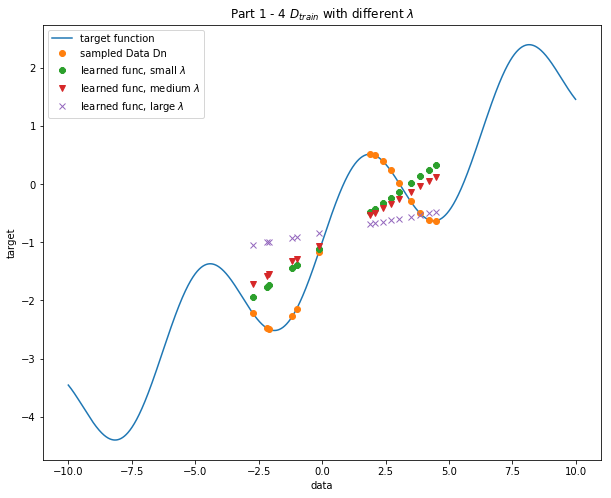

In [36]:
#initialize weights
weight = np.random.rand(1)
bias = 0

#param holders
regGDsmallParam = []
regGDMedParam = []
regGDLargeParam = []

#Small lambda
# reinit the params
weight = np.random.rand(1)
bias = 0
regGDsmall = gradDescent(weightedDecay = 0.01, stepSize = 0.00025)
regGDsmallParam = regGDsmall.regression_gradient(weight, bias, dataDn[0], dataDn[1])

weight = np.random.rand(1)
bias = 0
regGDMed = gradDescent(weightedDecay = 1, stepSize = 0.00025)
regGDMedParam = regGDMed.regression_gradient(weight, bias, dataDn[0], dataDn[1])

weight = np.random.rand(1)
bias = 0
regGDLarge = gradDescent(weightedDecay = 20, stepSize = 0.00025)
regGDLargeParam = regGDLarge.regression_gradient(weight, bias, dataDn[0], dataDn[1])

# learned functions
learnedFuncSmall = (regGDsmallParam[0] * dataDn[0]) + regGDsmallParam[1]
learnedFuncMed = (regGDMedParam[0] * dataDn[0]) + regGDMedParam[1]
learnedFuncLarge = (regGDLargeParam[0] * dataDn[0]) + regGDLargeParam[1]
#plot data function
xvals = np.arange(-10, 10, 0.01)
plt.rcParams['figure.figsize'] = [10, 8]

plt.plot(xvals, hX(xvals), label = "target function")
plt.plot(dataDn[0], target, 'o', label="sampled Data Dn")
plt.plot(dataDn[0], learnedFuncSmall, '8', label = "learned func, small $\lambda$")
plt.plot(dataDn[0], learnedFuncMed, 'v', label = "learned func, medium $\lambda$")
plt.plot(dataDn[0], learnedFuncLarge, 'x', label = "learned func, large $\lambda$")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 1 - 4 $D_{train}$ with different $\lambda$")
plt.legend(loc='best')
plt.show()


## 5. Sample $D_{test}$ from $h(X)$
We follow the same procedure as $D_{n}$ , training models on $\lambda$ = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100].

See the plot below:

weight size,  (1,)
weight size,  (1,)
weight size,  (1,)
weight size,  (1,)
weight size,  (1,)
weight size,  (1,)
weight size,  (1,)


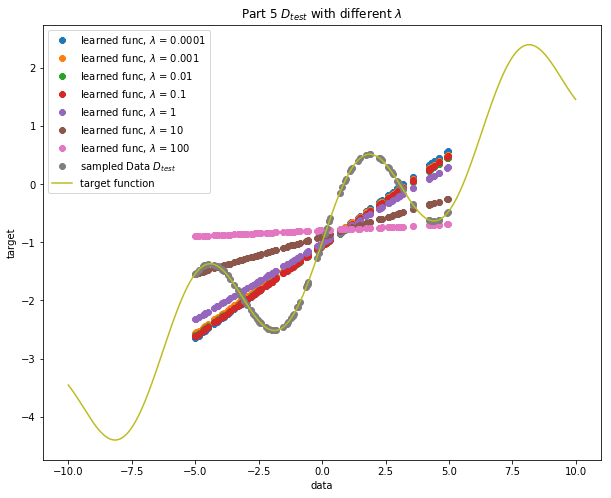

In [37]:
#sample D_test
data = np.random.uniform(-5,5,100)
target = hX(data)
dataDtest = [data, target]

lambdaVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
weight = np.random.rand(1)
bias = 0

lossArr = []

for i in lambdaVals:
    regGD = gradDescent(weightedDecay = i, stepSize = 0.00025)
    regGDParam = regGD.regression_gradient(weight, bias, dataDn[0], dataDn[1])
    
    xvals = np.arange(-10, 10, 0.01)
    plt.rcParams['figure.figsize'] = [10, 8]
    learnedFunc = (regGDParam[0] * dataDtest[0]) + regGDParam[1]
    
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr.append(loss)
    plt.plot(dataDtest[0], learnedFunc, '8', label = "learned func, $\lambda$ = {}".format(i) )    

plt.plot(dataDtest[0], dataDtest[1], 'o', label="sampled Data $D_{test}$")
plt.plot(xvals, hX(xvals), label = "target function")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 5 $D_{test}$ with different $\lambda$")
plt.legend(loc='best')
plt.show()

### Then we plot $\lambda$  on the x-axis, and loss on the y-axis:
N.B. to TAs: we plotted $lambda$ on log scale

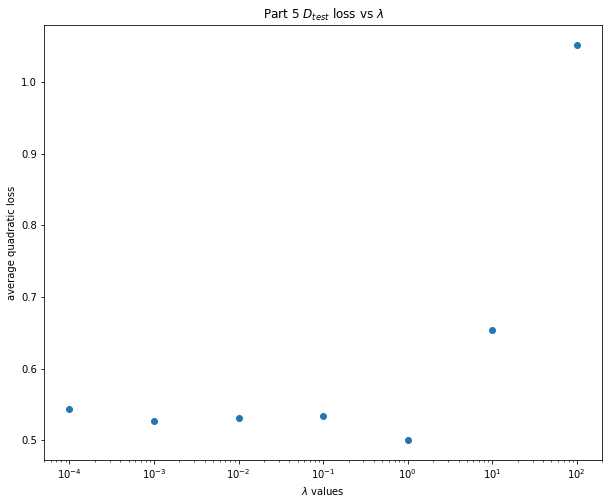

In [38]:
plt.plot(np.array(lambdaVals),np.array(lossArr), 'o')
plt.xlabel("$\lambda$ values")
plt.xticks(range(len(lambdaVals)), np.array(lambdaVals))
plt.xscale('log')
plt.ylabel("average quadratic loss")
plt.title("Part 5 $D_{test}$ loss vs $\lambda$")
plt.show()

## 6. Nonlinear preprocessing

We set $\lambda = 0.01$ and try fitting different degrees of polynomials.


weight size,  (1, 1)
learnedFunc [-1.82660477 -1.80238145 -1.77815812 -1.75393479 -1.72971146 -1.70548813
 -1.6812648  -1.65704147 -1.63281814 -1.60859481 -1.58437148 -1.56014815
 -1.53592482 -1.51170149 -1.48747816 -1.46325483 -1.4390315  -1.41480817
 -1.39058484 -1.36636151 -1.34213818 -1.31791485 -1.29369152 -1.26946819
 -1.24524486 -1.22102154 -1.19679821 -1.17257488 -1.14835155 -1.12412822
 -1.09990489 -1.07568156 -1.05145823 -1.0272349  -1.00301157 -0.97878824
 -0.95456491 -0.93034158 -0.90611825 -0.88189492 -0.85767159 -0.83344826
 -0.80922493 -0.7850016  -0.76077827 -0.73655494 -0.71233161 -0.68810828
 -0.66388495 -0.63966162 -0.6154383  -0.59121497 -0.56699164 -0.54276831
 -0.51854498 -0.49432165 -0.47009832 -0.44587499 -0.42165166 -0.39742833
 -0.373205   -0.34898167 -0.32475834 -0.30053501 -0.27631168 -0.25208835
 -0.22786502 -0.20364169 -0.17941836 -0.15519503 -0.1309717  -0.10674837
 -0.08252504 -0.05830171 -0.03407839 -0.00985506  0.01436827  0.0385916
  0.06281493  0.087

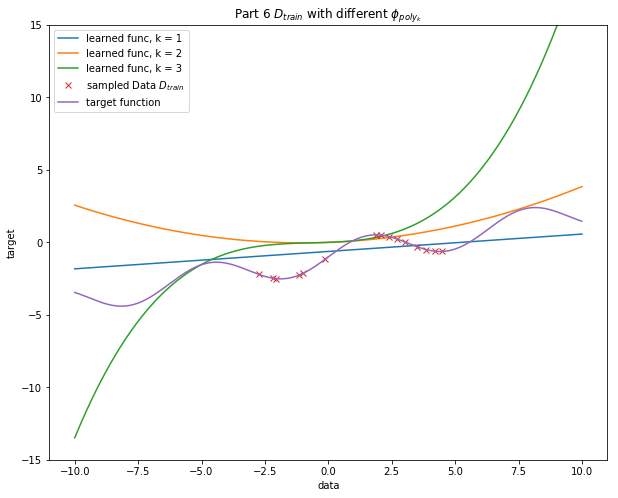

In [150]:
kDegreeArr = [1, 2, 3]
stepsizeArr = [0.0001, 0.000000001, 0.00000000001]#, 0.001, 0.01, 0.1]
numStepArr = [4000, 4000, 6000] #, 400000]
#kDegreeArr = [4] #, 5, 6]
#stepsizeArr = [0.000000000000001 ]#, 0.00000001, 0.00000001]


weight = np.random.rand(1)
bias = 0

plt.rcParams['figure.figsize'] = [10, 8]
plt.ylim(top = 15, bottom=-15)


lossArr_train = []
lossArr_test = []

# Function to do a mapping from a 1d X.
def to_map(input_data, k):
    to_map = [input_data]
    for i in range(2, k+1): # kDegreeArr[j]+1):
        #print('i', i)
        raised = np.power(input_data, i)
        #print("raised:", raised)
        to_map.append(raised)
    dataK = np.column_stack(to_map)
    #dataKn = [dataK, input_data[1]] #same target
    return dataK #, dataKn
    
for k in kDegreeArr:
    # Do the mapping
    
    dataDM = []
    for data in dataDn[0]:
        dataDM.append(to_map(data, k))
    dataDM = np.array(dataDM)

    dataK = np.array(np.linspace(-5, 5, 100))
    dataKn = [dataK , hX(dataK)]
    #print('datak_orig', dataK)
    #dataKM = to_map(dataK, k)
    dataKM = []
    for data in dataK:
        dataKM.append(to_map(data, k))
    dataKM = np.array(dataKM)
    #print('dataKM', dataKM)

    # Do the descent
    regGD = gradDescent(weightedDecay = 0.01, 
                        stepSize = stepsizeArr[kDegreeArr.index(k)],
                        numberSteps= numStepArr[kDegreeArr.index(k)])
    regGDParam = regGD.regression_gradient(weight, bias, dataDM, dataDn[1])
    
    # Plot
    learnedFunc = regGDParam[0] * dataKM + regGDParam[1]
    #print('learnedFunc', learnedFunc)
    learnedFunc = np.sum(learnedFunc, axis = 1)
    learnedFunc = np.sum(learnedFunc, axis = 1)

    
    #print("dataK", dataK, '\n'
    #      "learnedFunc", learnedFunc)
    dataK = np.array(np.linspace(-10, 10, 100))
    #print('dataK', dataK)
    print('learnedFunc', learnedFunc)
    plt.plot(dataK, learnedFunc, label = "learned func, k = {}".format(k)) 
    # Calculate training error (for next part)
    loss = np.mean((learnedFunc - dataKn[1])**2)
    lossArr_train.append(loss)
    
xvals = np.arange(-10, 10, 0.01)    
plt.plot(dataDn[0], dataDn[1], 'x', label="sampled Data $D_{train}$")
plt.plot(xvals, hX(xvals), label = "target function")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 6 $D_{train}$ with different $\phi_{{poly}_k}$")
plt.legend(loc='best')
plt.show()

## 7. Increasing $l$

We plot the the empirical risk (loss on $D_{n}$ and the true risk (loss on $D_{test}$) with increasing $l$:

In [153]:
# Already got training loss, so now get testing loss:
lossArr_test = []
for k in kDegreeArr:
    # Do the mapping
    dataKM = []
    for data in dataDtest[0]:
        dataKM.append(to_map(data, k))
    dataDtestKM = np.array(dataKM)
    # Do the descent
    #regGD = gradDescent(weightedDecay = 0.01, stepSize = 0.0001)
    #regGDParam = regGD.regression_gradient(weight, bias, dataDn[0], dataDn[1])
    
    # Get the function
    learnedFunc = regGDParam[0] * dataDtestKM + regGDParam[1]
    #print('learnedFunc', learnedFunc)

    learnedFunc = np.sum(learnedFunc, axis = 1)
    learnedFunc = np.sum(learnedFunc, axis = 1)

    print('learnedFunc', learnedFunc)
    
    # Calculate training error (for next part)
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr_test.append(loss)

# Plot
ind = np.arange(len(kDegreeArr))
width = 0.35  

plt.bar(ind, np.array(lossArr_train), width, label="Empirical risk (loss on $D_{n}$)")
plt.bar(ind + width, np.array(lossArr_test), width, label="True risk (loss on $D_{test}$)")
plt.xlabel("Degree $l$ of learned function")
plt.ylabel("Average quadratic loss")
plt.title("Part 6 - Degree of learned function vs. risk")

plt.xticks(ind + width / 2, ('1', '2', '3'))
plt.legend(loc='best')
plt.show()

learnedFunc [-1.22301595  1.77044988  1.17460497  0.87718191 -1.5962238   0.07609114
 -0.24181713  1.37564203 -1.39638169 -1.33116573 -1.51774248 -1.57998719
  1.65516923  0.86194137  0.12497845  1.18125546  1.6204671   1.22720751
 -0.81463542 -1.04495755  0.89013192 -1.08347783  0.04445838 -0.20793182
  0.73021411 -1.77296969 -1.49042701 -1.17805947 -1.22493497  0.90808776
  0.73300691  0.43118296 -1.78218943 -0.94360449 -1.02120022 -0.98962602
 -0.4668938  -0.44163535  1.8975154  -0.22052101 -1.81086259 -1.24024248
 -0.37117658 -1.49348634 -1.43410209 -1.6335109  -1.72490259  1.14328231
  1.07626005  1.77383182 -0.70933939  0.44475466  0.35915973 -1.92418753
  0.46006056 -0.69760646 -1.22680887 -0.02055335 -0.76790958  1.70159375
 -0.7635464  -0.80552849 -0.58816482  0.35099709  1.05481066  0.2655661
 -1.91319464 -0.53336007 -1.87396467  0.67341974 -0.93837735 -0.22983702
 -0.85392216  1.38740521  1.6305147  -0.2262497  -0.42614753  0.57915378
  0.10934583  0.30718131 -0.97057055  1.

ValueError: operands could not be broadcast together with shapes (1,3) (100,1,2) 

### for readibility, we plot the error and learned function when Poly degree = 4 separately

weight size,  (4,)


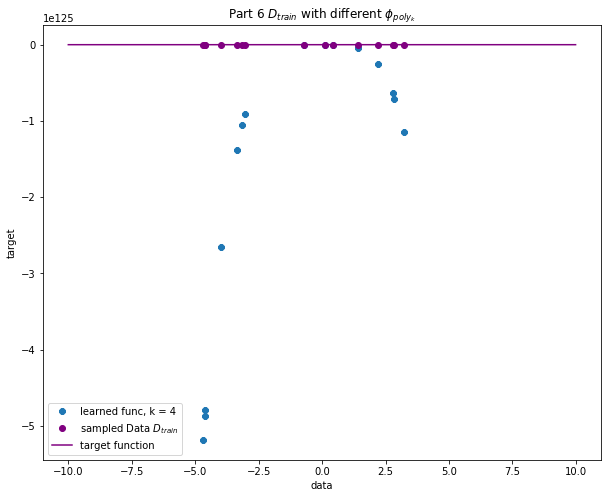

weight size,  (4,)
train loss dim = 4 is [5.782207818645246e+250]
test loss dim = 4 is [2.5702020782900857e+277]


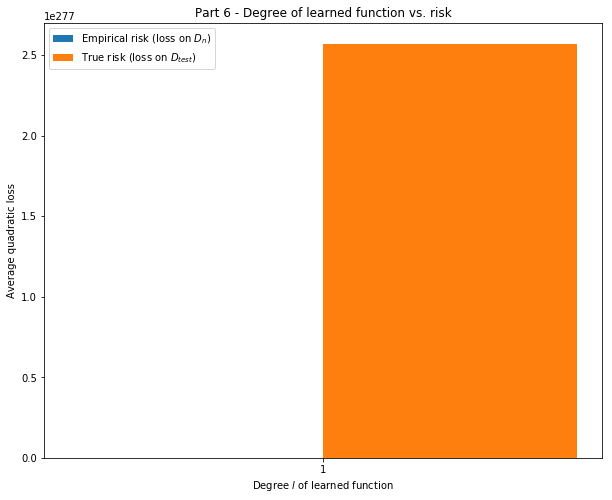

In [8]:
kDegreeArr = [4]#[1, 2, 3]
weight = np.random.rand(1)
bias = 0

plt.rcParams['figure.figsize'] = [10, 8]

lossArr_train = []
lossArr_test = []

# Function to do a mapping from a 1d X.
def to_map(input_data, k):
    to_map = [input_data[0]]
    for i in range(2, k+1): # kDegreeArr[j]+1):
        raised = np.power(input_data[0], k)
        to_map.append(raised)
    dataK = np.column_stack(to_map)
    dataKn = [dataK, input_data[1]] #same target
    return dataK, dataKn
    
for k in kDegreeArr:
    # Do the mapping
    dataK, dataKn = to_map(dataDn, k)
    
    # Do the descent
    regGD = gradDescent(weightedDecay = 0.01, stepSize = 0.0001)
    regGDParam = regGD.regression_gradient(weight, bias, dataKn[0], dataKn[1])
    
    # Plot
    learnedFunc = regGDParam[0] * dataK + regGDParam[1]
    learnedFunc = np.sum(learnedFunc, axis = 1)
    plt.plot(dataDn[0], learnedFunc, '8', label = "learned func, k = {}".format(k)) 
    
    # Calculate training error (for next part)
    loss = np.mean((learnedFunc - dataDn[1])**2)
    lossArr_train.append(loss)
    
xvals = np.arange(-10, 10, 0.01)    
plt.plot(dataDn[0], dataDn[1], 'o', label="sampled Data $D_{train}$", color='purple')
plt.plot(xvals, hX(xvals), label = "target function", color='purple')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Part 6 $D_{train}$ with different $\phi_{{poly}_k}$")
plt.legend(loc='best')
plt.show()


# Already got training loss, so now get testing loss:
lossArr_test = []
for k in kDegreeArr:
    # Do the mapping
    dataK, dataKn = to_map(dataDtest, k)
    
    # Do the descent
    regGD = gradDescent(weightedDecay = 0.01, stepSize = 0.0001)
    regGDParam = regGD.regression_gradient(weight, bias, dataKn[0], dataKn[1])
    
    # Get the function
    learnedFunc = regGDParam[0] * dataK + regGDParam[1]
    learnedFunc = np.sum(learnedFunc, axis = 1)
    
    # Calculate training error (for next part)
    loss = np.mean((learnedFunc - dataDtest[1])**2)
    lossArr_test.append(loss)

print("train loss dim = 4 is", lossArr_train)
print("test loss dim = 4 is", lossArr_test)
# Plot
ind = np.arange(len(kDegreeArr))
width = 0.35  

plt.bar(ind, np.array(lossArr_train), width, label="Empirical risk (loss on $D_{n}$)")
plt.bar(ind + width, np.array(lossArr_test), width, label="True risk (loss on $D_{test}$)")
plt.xlabel("Degree $l$ of learned function")
plt.ylabel("Average quadratic loss")
plt.title("Part 6 - Degree of learned function vs. risk")

plt.xticks(ind + width / 2, ('1', '2', '3'))
plt.legend(loc='best')
plt.show()

When $l$ increases to 3 and 4, the test error is significantly higher than dim  = 1, 2, 3. The best $l$ with lesat loss is $l = 2$ This shows that the model overfits when the feature mapping maps to a high dimension, in this case $\ge 4$. We can also visualize that we draw our data from a true target function, which is a polynomial of degree $=2$, and using a polynomial of $degree = 4$ is not a good approach.